In [2]:
import pandas as pd
import numpy as np
from fbprophet import Prophet


In [3]:
from google.colab import files

uploaded = files.upload()

Saving Train_SU63ISt.csv to Train_SU63ISt.csv
Saving Test_0qrQsBZ.csv to Test_0qrQsBZ.csv


In [4]:
train = pd.read_csv('Train_SU63ISt.csv')
test = pd.read_csv('Test_0qrQsBZ.csv')

In [5]:
train 

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [6]:
test

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00
...,...,...
5107,23395,26-04-2015 19:00
5108,23396,26-04-2015 20:00
5109,23397,26-04-2015 21:00
5110,23398,26-04-2015 22:00


In [7]:
# Convert to datetime format
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
train['hour'] = train.Datetime.dt.hour

In [8]:
train

,ID,Datetime,Count,hour
0,0,2012-08-25 00:00:00,8,0
1,1,2012-08-25 01:00:00,2,1
2,2,2012-08-25 02:00:00,6,2
3,3,2012-08-25 03:00:00,2,3
4,4,2012-08-25 04:00:00,2,4
...,...,...,...,...
18283,18283,2014-09-25 19:00:00,868,19
18284,18284,2014-09-25 20:00:00,732,20
18285,18285,2014-09-25 21:00:00,702,21
18286,18286,2014-09-25 22:00:00,580,22


In [9]:
train.groupby(['hour']).mean()

,ID,Count
hour,,
0,9132.0,147.695538
1,9133.0,117.868766
2,9134.0,99.753281
3,9135.0,82.422572
4,9136.0,69.375328
5,9137.0,62.102362
6,9138.0,66.776903
7,9139.0,77.443570
8,9140.0,89.181102


In [10]:
hourly_frac = train.groupby(['hour']).mean()/np.sum(train.groupby(['hour']).mean())

In [11]:
np.sum(train.groupby(['hour']).mean())

ID       219444.000000
Count      3334.994751
dtype: float64

In [12]:
hourly_frac.drop(['ID'], axis = 1, inplace = True)


In [13]:
hourly_frac.columns = ['fraction']

In [14]:
train.index = train.Datetime  

In [15]:
train.drop(['ID','hour','Datetime'], axis = 1 , inplace =True)



In [16]:
train

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2
...,...
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702


In [17]:
daily_train = train.resample('D').sum()

In [19]:
daily_train

,Count
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60
...,...
2014-09-21,9102
2014-09-22,14116
2014-09-23,13304


In [20]:
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Count
daily_train.drop(['Count'],axis = 1, inplace = True)

In [22]:
m = Prophet(daily_seasonality = True, seasonality_prior_scale=0.1)
m.fit(daily_train)
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future)

In [23]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-415.972760,-2270.799480,143.829895,-415.972760,-415.972760,-677.705332,-677.705332,-677.705332,-253.647669,-253.647669,-253.647669,-994.484161,-994.484161,-994.484161,570.426498,570.426498,570.426498,0.0,0.0,0.0,-1093.678091
1,2012-08-26,-407.942942,-2491.537034,-41.118977,-407.942942,-407.942942,-835.982566,-835.982566,-835.982566,-253.647669,-253.647669,-253.647669,-1143.426318,-1143.426318,-1143.426318,561.091420,561.091420,561.091420,0.0,0.0,0.0,-1243.925507
2,2012-08-27,-399.913123,-840.466778,1545.770734,-399.913123,-399.913123,752.490594,752.490594,752.490594,-253.647669,-253.647669,-253.647669,457.234512,457.234512,457.234512,548.903750,548.903750,548.903750,0.0,0.0,0.0,352.577470
3,2012-08-28,-391.883305,-639.376207,1732.116483,-391.883305,-391.883305,888.952343,888.952343,888.952343,-253.647669,-253.647669,-253.647669,607.922653,607.922653,607.922653,534.677358,534.677358,534.677358,0.0,0.0,0.0,497.069038
4,2012-08-29,-383.853487,-738.427041,1567.211734,-383.853487,-383.853487,822.110623,822.110623,822.110623,-253.647669,-253.647669,-253.647669,556.513457,556.513457,556.513457,519.244835,519.244835,519.244835,0.0,0.0,0.0,438.257136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,2015-04-22,16509.557304,15328.667670,17789.111455,16085.703350,16944.647831,43.681820,43.681820,43.681820,-253.647669,-253.647669,-253.647669,556.513457,556.513457,556.513457,-259.183968,-259.183968,-259.183968,0.0,0.0,0.0,16553.239124
971,2015-04-23,16537.097154,15157.632540,17622.227522,16110.522371,16973.507961,-189.131281,-189.131281,-189.131281,-253.647669,-253.647669,-253.647669,360.159903,360.159903,360.159903,-295.643516,-295.643516,-295.643516,0.0,0.0,0.0,16347.965872
972,2015-04-24,16564.637004,14890.055444,17304.114001,16135.866524,17004.844375,-434.297281,-434.297281,-434.297281,-253.647669,-253.647669,-253.647669,156.079953,156.079953,156.079953,-336.729566,-336.729566,-336.729566,0.0,0.0,0.0,16130.339723
973,2015-04-25,16592.176854,13679.992289,16206.735819,16161.253863,17036.107533,-1629.799059,-1629.799059,-1629.799059,-253.647669,-253.647669,-253.647669,-994.484161,-994.484161,-994.484161,-381.667230,-381.667230,-381.667230,0.0,0.0,0.0,14962.377795


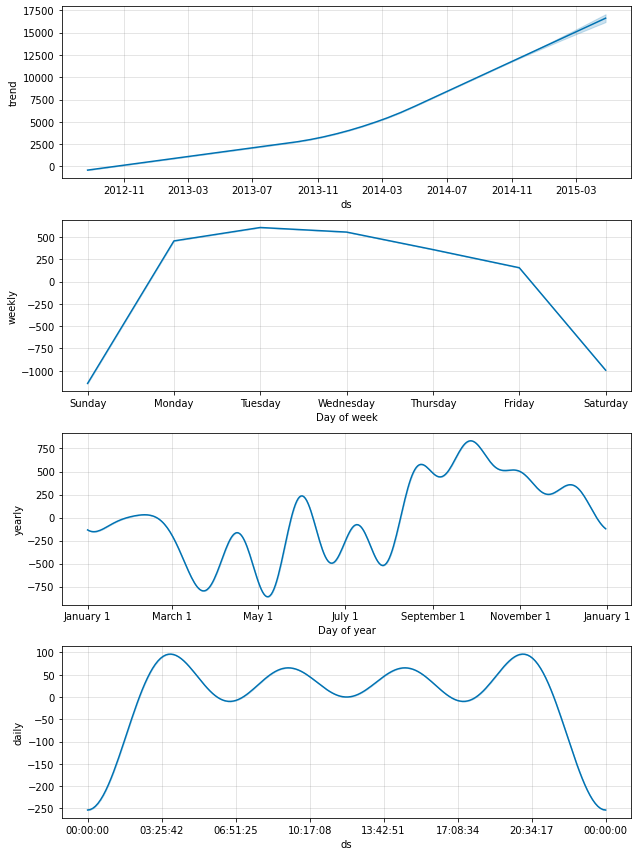

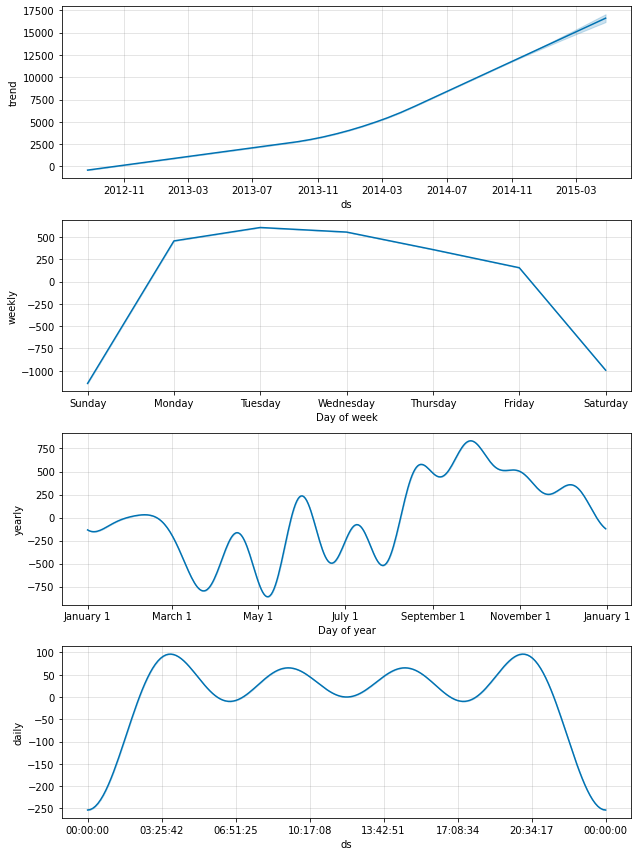

In [24]:
m.plot_components(forecast)